# 1.2 Construção do Modelo

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels

### 1.2.1 Abrindo o dataset e tratando os dados

In [4]:
data = pd.read_csv('PCOS.csv')

In [56]:
data.head(2)

,Unnamed: 0,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,1,1,0,28,44.6,152.0,19.3,15,78,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,1,2,2,0,36,65.0,161.5,24.9,15,74,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7


In [5]:
data.dropna(inplace=True)

In [6]:
data = data.replace({'1.99.': 1.99})

In [7]:
del data["Sl. No"]
del data["Patient File No."]
del data["Unnamed: 0"]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of abortions        539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

In [61]:
data[data['AMH(ng/mL)'] == "a"]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
305,0,37,56.0,152.0,24.2,13,74,20,11.7,2,...,1,0.0,1,120,70,4,5,17.0,16.0,5.6


In [8]:
data.drop([305], inplace=True)

In [9]:
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'])

In [10]:
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1    Age (yrs)              538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of abortions        538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    fl

### Usando a correlação de Pearson para encontrar os melhores atributos preditores

In [11]:
X = data.drop(columns=['PCOS (Y/N)'], axis=1)
y = data["PCOS (Y/N)"]

In [67]:
correlations = []
for col in X.columns:
    corr, _ = pearsonr(X[col], y)
    correlations.append(corr)

# obtendo o módulo dos coeficientes de correlação
correlations = map(math.fabs, correlations)


# criar um dicionário de features e seus coeficientes de correlação
corr_dict = dict(zip(X.columns, correlations))


# ordena o dicionário por coeficiente de correlação em ordem decrescente
sorted_corr_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: item[1], reverse=True)}

N = 20
selected_features = list(sorted_corr_dict.keys())[:N]


X_selected = X[selected_features]

In [66]:
sorted_corr_dict

{'Follicle No. (R)': 0.6509293268205653,
 'Follicle No. (L)': 0.6012075344576073,
 'Skin darkening (Y/N)': 0.4813225853636568,
 'hair growth(Y/N)': 0.46650807663782295,
 'Weight gain(Y/N)': 0.44309277381787116,
 'Cycle(R/I)': 0.4018368508005646,
 'Fast food (Y/N)': 0.3809851545915707,
 'Pimples(Y/N)': 0.29033457675973073,
 'AMH(ng/mL)': 0.26397383229790855,
 'Weight (Kg)': 0.209969083409036,
 'BMI': 0.1988537624942429,
 'Hair loss(Y/N)': 0.176495666712654,
 'Waist(inch)': 0.1619222364030457,
 'Hip(inch)': 0.16088241390889588,
 'Avg. F size (L) (mm)': 0.12999690502916517,
 'Endometrium (mm)': 0.10763920805669376,
 'Avg. F size (R) (mm)': 0.0945281351583852,
 'Pulse rate(bpm) ': 0.09269946744254376,
 'Hb(g/dl)': 0.0878085763351018,
 'Vit D3 (ng/mL)': 0.08582526363066116,
 'Reg.Exercise(Y/N)': 0.07197947368905047,
 'Height(Cm) ': 0.06546468503019073,
 'LH(mIU/mL)': 0.06407370452384918,
 'RBS(mg/dl)': 0.04945219997010917,
 'RR (breaths/min)': 0.03864107081212037,
 'Blood Group': 0.03370147

### Separando o conjunto de testes e treino

Partição 70/30

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.30)

### Normalizando os atributos preditores

In [69]:
X_train_norm = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))

c:\Users\callidus\anaconda3\envs\RNA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\callidus\anaconda3\envs\RNA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [70]:
X_test_norm = (X_test - np.min(X_train))/(np.max(X_train) - np.min(X_train))

### Estimando o número de neurônios


1. Obtendo os valores de $N_i$ e $N_o$

In [29]:
n_o = 1
n_i = X_selected.shape[1] + 1

print(f'No: {n_o}')
print(f'Ni: {n_i}')

No: 1
Ni: 21


2. Testando os valores de $\alpha$ como $0.5$, $2$ e $3$.

In [25]:
import math 

alphas = [0.5, 2, 3]
n_h = []

for alpha in alphas:
  n_h.append(round(alpha * math.sqrt(n_i * n_o)))

n_h

[3, 13, 20]

Arquiteturas segundo a regra da pirâmide geométrica

In [30]:
def get_architectures(Nh, quant):
    S = [i for i in range(int(Nh))]
    arch_list = []
    for i in range(len(S)):
        for j in range(len(S)):
            if ((S[i], S[j]) not in arch_list) and (i + j == len(S) and (len(arch_list) < quant)):
                arch_list.append((S[i], S[j]))
    
    return arch_list

layer_arch = []
layer_0 = get_architectures(n_h[0], 2)
layer_1 = get_architectures(n_h[1], 9)
layer_2 = get_architectures(n_h[2], 14)
layer_arch = layer_0 + layer_1 + layer_2

print(layer_arch)
print(len(layer_arch))


[(1, 2), (2, 1), (1, 12), (2, 11), (3, 10), (4, 9), (5, 8), (6, 7), (7, 6), (8, 5), (9, 4), (1, 19), (2, 18), (3, 17), (4, 16), (5, 15), (6, 14), (7, 13), (8, 12), (9, 11), (10, 10), (11, 9), (12, 8), (13, 7), (14, 6)]
25


### Busca em Grade

**MLP**
- Paciência:
- batch_size: 
- $\beta_1$: 
- $\beta_2$:
- Épocas: 
- Função de ativação: relu, logistic

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': layer_arch, 
              'activation': ['relu','logistic'],
              'batch_size': [16, 32],
              'solver': ['adam'],
              'beta_1': [1, 0.9, 0.8],
              'beta_2': [0.999, 0.95, 0.9],
              'n_iter_no_change': [25, 50],
              'verbose': [False],
              'max_iter': [300, 500]
}

Busca em grade utilizando MLP

In [ ]:
grid_mlp = GridSearchCV(MLPClassifier(), param_grid, verbose=1, cv=5 n_jobs=-1, scoring='accuracy')

### Algoritmo XGBoost

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

clf = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=120,
    random_state=0).fit(X_train_norm, y_train)

print(clf.score(X_test_norm, y_test))

print("=-=-=-=-=-=-=")

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in clf.staged_predict(X_test_norm)]

best_n_estimator = np.argmin(errors) + 1

clf_best =  GradientBoostingClassifier(
    max_depth=2,
    n_estimators=best_n_estimator,
    random_state=0).fit(X_train_norm, y_train)

print(clf_best.score(X_test_norm, y_test))

y_pred = clf.predict(X_test_norm)

0.8950617283950617
=-=-=-=-=-=-=
0.9135802469135802


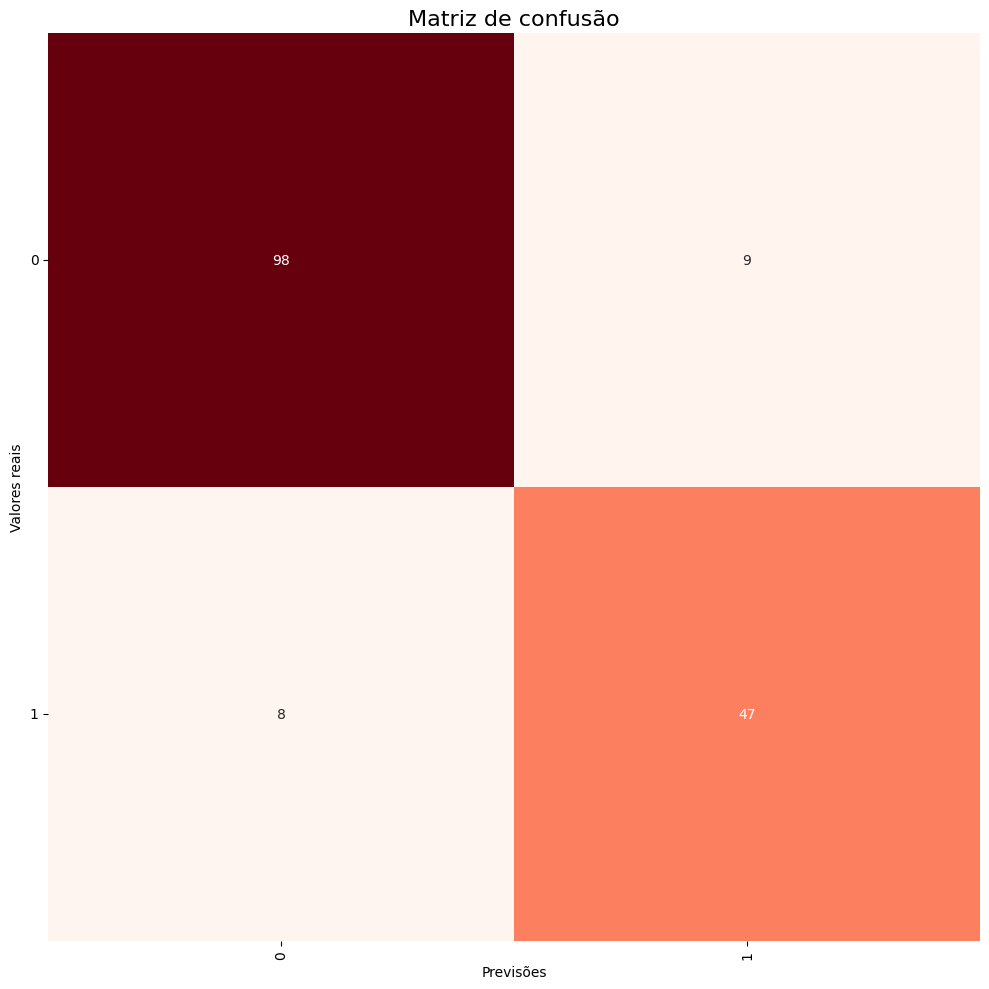

In [82]:
def confusion_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    classes = unique_labels(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax)

    ax.set_xlabel('Previsões')
    ax.set_ylabel('Valores reais')
    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticklabels(classes, rotation=0)

    title = 'Matriz de confusão'
    ax.set_title(title, fontsize=16)

    plt.tight_layout()
    plt.show()

confusion_matrix(y_test, y_pred)